<a href="https://colab.research.google.com/github/sbanuba/CaseStudy_eComm/blob/main/attribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Marketing Intelligence Analyst.
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
4. Evaluation
5. Deployment

### Multi-Touch Attribution:

## 1. Business Understanding
#### Scenario:

The marketing team has provided you with two sets of data on customer interactions, that took place before a purchase. Each data set represents a different market or customer segment group. Your task is to analyze this data and determine the most appropriate attribution model for each data set.

#### Task
#### - Data analysis:

Examine the customer journeys in both data sets. Which attribution model would you recommend for the data sets and why?

#### - Comparison and conclusions:

Compare the suitability of the models for both data sets. Explain why you think the model fits best for the respective data set. Are there scenarios in which the models you selected might not be optimal?

#### - Presentation:

Create a presentation or report outlining your analysis, recommendations and conclusions for the marketing team and management.

Please also send in your code



# 2. Data Understanding


In [31]:
# import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from marketing_attribution_models import MAM

In [33]:
# Load datasets
df1 = pd.read_csv('https://raw.githubusercontent.com/sbanuba/attribution/main/cj_data1.csv?token=GHSAT0AAAAAACTMAMT7BAFYMINZ7FBYB5UGZU7UMYA') # customer journey 1
df2 = pd.read_csv('https://raw.githubusercontent.com/sbanuba/attribution/main/cj_data2.csv?token=GHSAT0AAAAAACTMAMT6GFZH4RQ7RQSI7S4QZU7UOTA') # customer journey 2

# Print customer journey 1
df1.head()

,Customer_ID,Purchase_Value,Touchpoints
0,1,93.958227,SEO
1,2,105.527694,Newsletter
2,3,70.081916,SEA
3,4,91.639093,Newsletter > SEA
4,5,116.350116,Affiliate


In [34]:
# Display the DataFrame df2
df2.head()

,Customer_ID,Purchase_Value,Touchpoints
0,30001,116.850691,Newsletter > SEA > SEA > Display > SEO > SEA >...
1,30002,136.573088,SEA > SEO > SEA > SEA
2,30003,142.272492,SEO > SEO > SEA > SEO > SEA > SEO > Newsletter...
3,30004,97.329775,SEO
4,30005,51.528772,Display > SEO > SEA > SEA > SEA > SEA > SEO


#### Looking at data dimensionality, feature names, and feature types.

In [35]:
df1.shape


(30000, 3)

In [36]:
df2.shape

(30000, 3)

In [37]:
df1.describe()

,Customer_ID,Purchase_Value
count,30000.000000,30000.000000
mean,15000.500000,84.931813
std,8660.398374,37.763505
min,1.000000,20.001964
25%,7500.750000,52.121453
50%,15000.500000,84.751787
75%,22500.250000,117.908741
max,30000.000000,149.993899


In [38]:
df2.describe()

,Customer_ID,Purchase_Value
count,30000.000000,30000.000000
mean,45000.500000,84.779172
std,8660.398374,37.731460
min,30001.000000,20.006613
25%,37500.750000,52.061186
50%,45000.500000,84.173976
75%,52500.250000,117.602278
max,60000.000000,149.996161


## Checking for Missing Values.

In [39]:
# Check for missing values df1
missing_values1 = df1.isnull().sum()

print(missing_values1)




Customer_ID       0
Purchase_Value    0
Touchpoints       0
dtype: int64


In [40]:
# Check for missing values df1
missing_values2 = df2.isnull().sum()

print(missing_values2)


Customer_ID       0
Purchase_Value    0
Touchpoints       0
dtype: int64


## Analyzing the Touchpoints and their impact on Purchase_Value.

In [41]:
# Group by Touchpoints and calculate the mean Purchase_Value for customer journey 1
touchpoint_analysis1 = df1.groupby('Touchpoints')['Purchase_Value'].mean().reset_index()

touchpoint_analysis1


,Touchpoints,Purchase_Value
0,Affiliate,87.721380
1,Affiliate > Display,85.665883
2,Affiliate > Newsletter,82.154080
3,Affiliate > SEA,84.970384
4,Affiliate > SEO,82.982438
5,Display,86.747490
6,Display > Affiliate,76.554544
7,Display > Newsletter,81.538611
8,Display > SEA,84.491674
9,Display > SEO,85.227381


In [42]:
# Group by Touchpoints and calculate the mean Purchase_Value for customer journey 2
touchpoint_analysis2 = df2.groupby('Touchpoints')['Purchase_Value'].mean().reset_index()

touchpoint_analysis2

,Touchpoints,Purchase_Value
0,Affiliate,85.669088
1,Affiliate > Affiliate,92.697694
2,Affiliate > Affiliate > Affiliate > SEA,54.087484
3,Affiliate > Affiliate > Affiliate > SEA > SEO,70.881296
4,Affiliate > Affiliate > Affiliate > SEA > SEO ...,138.030993
...,...,...
8214,SEO > SEO > SEO > SEO > SEO > SEA > SEO,113.386974
8215,SEO > SEO > SEO > SEO > SEO > SEA > SEO > SEO,122.702834
8216,SEO > SEO > SEO > SEO > SEO > SEO,49.427800
8217,SEO > SEO > SEO > SEO > SEO > SEO > Affiliate ...,92.216290


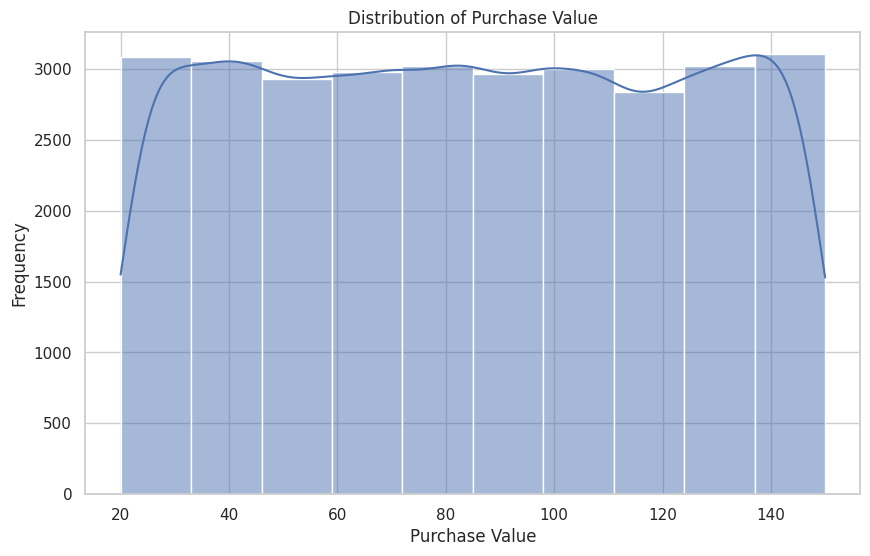

In [43]:

# Set plot style
sns.set(style="whitegrid")

# Histogram of Purchase_Value
plt.figure(figsize=(10, 6))
sns.histplot(df1['Purchase_Value'], kde=True, bins=10)
plt.title('Distribution of Purchase Value')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()




<ipython-input-44-37fb761a01b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Touchpoints', y='Purchase_Value', data=df1, palette='viridis')


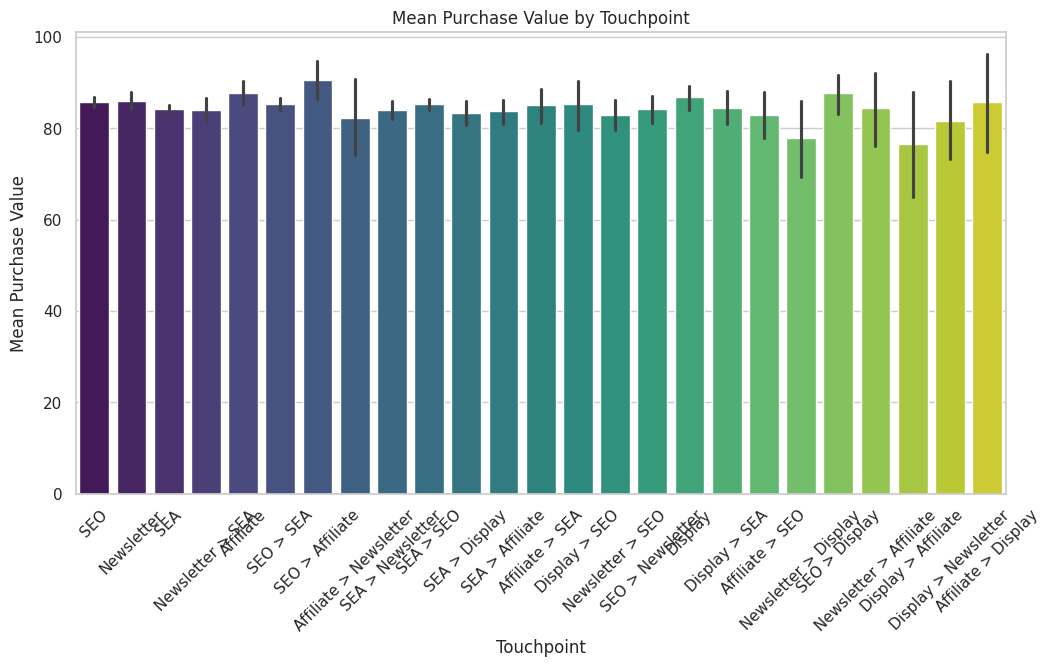

In [44]:
# Set plot style
sns.set(style="whitegrid")

# Bar chart of mean Purchase_Value by Touchpoint
plt.figure(figsize=(12, 6))
sns.barplot(x='Touchpoints', y='Purchase_Value', data=df1, palette='viridis')
plt.title('Mean Purchase Value by Touchpoint')
plt.xlabel('Touchpoint')
plt.ylabel('Mean Purchase Value')
plt.xticks(rotation=45)
plt.show()

## 3. DATA PREPARATION
  The required data preparation will be done according to the selected attribution model in question.

  We can want to try few MTA models:
  - First Touch
  - Last Touch
  - U-Shape
  - Time-decay
  - Regressin
  - Sharply
  - Marchove



# MODELLING

# 4. MULTI-TOUCH ATTRIBUTION MODELLING

## A. STATIC MTAs



## 1. First Touch MTA


In [45]:
# Extract the first attribute from the Touchpoint Column for each data set
df1['First_Touchpoint'] = df1['Touchpoints'].apply(lambda x: x.split(' > ')[0])
df2['First_Touchpoint'] = df2['Touchpoints'].apply(lambda x: x.split(' > ')[0])

# Calculate total purchase value attributed to each first touchpoint
attribution_df1 = df1.groupby('First_Touchpoint')['Purchase_Value'].sum().reset_index()
attribution_df2 = df2.groupby('First_Touchpoint')['Purchase_Value'].sum().reset_index()

print("First-Touch Attribution for Dataset 1:")
print(attribution_df1)

print("\nFirst-Touch Attribution for Dataset 2:")
print(attribution_df2)

First-Touch Attribution for Dataset 1:
  First_Touchpoint  Purchase_Value
0        Affiliate    1.281932e+05
1          Display    1.198811e+05
2       Newsletter    2.541076e+05
3              SEA    1.277679e+06
4              SEO    7.680937e+05

First-Touch Attribution for Dataset 2:
  First_Touchpoint  Purchase_Value
0        Affiliate    1.226778e+05
1          Display    1.309042e+05
2       Newsletter    2.563582e+05
3              SEA    1.273922e+06
4              SEO    7.595134e+05


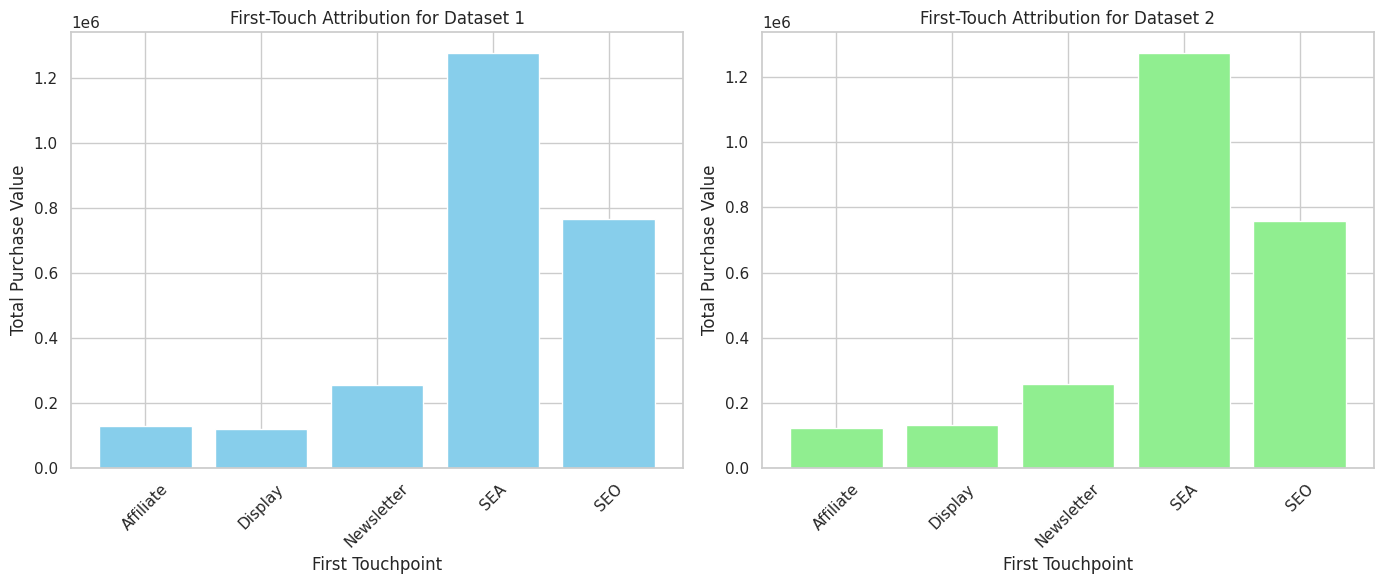

In [47]:
# Visualize bar graph
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Dataset 1
axes[0].bar(attribution_df1['First_Touchpoint'], attribution_df1['Purchase_Value'], color='skyblue')
axes[0].set_title('First-Touch Attribution for Dataset 1')
axes[0].set_xlabel('First Touchpoint')
axes[0].set_ylabel('Total Purchase Value')
axes[0].tick_params(axis='x', rotation=45)

# Dataset 2
axes[1].bar(attribution_df2['First_Touchpoint'], attribution_df2['Purchase_Value'], color='lightgreen')
axes[1].set_title('First-Touch Attribution for Dataset 2')
axes[1].set_xlabel('First Touchpoint')
axes[1].set_ylabel('Total Purchase Value')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 2. Last Touch MTA


In [48]:
# Extract the last touchpoint for each dataset
df1['Last_Touchpoint'] = df1['Touchpoints'].apply(lambda x: x.split(' > ')[-1])
df2['Last_Touchpoint'] = df2['Touchpoints'].apply(lambda x: x.split(' > ')[-1])

# Calculate total purchase value attributed to each last touchpoint
attribution_df1 = df1.groupby('Last_Touchpoint')['Purchase_Value'].sum().reset_index()
attribution_df2 = df2.groupby('Last_Touchpoint')['Purchase_Value'].sum().reset_index()

print("Last-Touch Attribution for Dataset 1:")
print(attribution_df1)

print("\nLast-Touch Attribution for Dataset 2:")
print(attribution_df2)

Last-Touch Attribution for Dataset 1:
  Last_Touchpoint  Purchase_Value
0       Affiliate    1.654716e+05
1         Display    1.581414e+05
2      Newsletter    3.180516e+05
3             SEA    1.064774e+06
4             SEO    8.415164e+05

Last-Touch Attribution for Dataset 2:
  Last_Touchpoint  Purchase_Value
0       Affiliate    1.264354e+05
1         Display    1.258294e+05
2      Newsletter    2.645701e+05
3             SEA    1.264129e+06
4             SEO    7.624109e+05


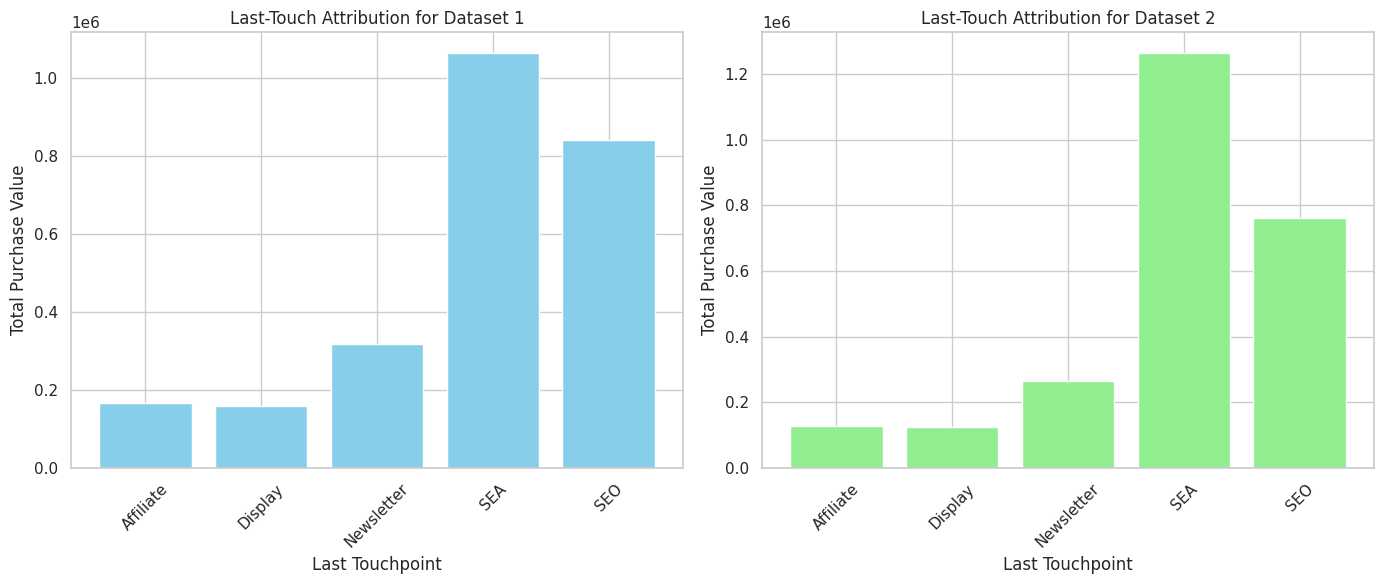

In [49]:
# Plotting last touch attribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Dataset 1
axes[0].bar(attribution_df1['Last_Touchpoint'], attribution_df1['Purchase_Value'], color='skyblue')
axes[0].set_title('Last-Touch Attribution for Dataset 1')
axes[0].set_xlabel('Last Touchpoint')
axes[0].set_ylabel('Total Purchase Value')
axes[0].tick_params(axis='x', rotation=45)

# Dataset 2
axes[1].bar(attribution_df2['Last_Touchpoint'], attribution_df2['Purchase_Value'], color='lightgreen')
axes[1].set_title('Last-Touch Attribution for Dataset 2')
axes[1].set_xlabel('Last Touchpoint')
axes[1].set_ylabel('Total Purchase Value')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('last_touch_attribution.png')  # Save the plot as an image file
plt.show()

## 3. U-SHAPE MTA

In [50]:
def calculate_u_shape_attribution(df):
    def u_shape_attribution(row):
        touchpoints = row['Touchpoints'].split(' > ')
        num_touchpoints = len(touchpoints)
        if num_touchpoints == 1:
            return pd.Series([row['Purchase_Value']] * 1, index=[touchpoints[0]])
        first_touchpoint = touchpoints[0]
        last_touchpoint = touchpoints[-1]
        intermediate_touchpoints = touchpoints[1:-1]

        # Allocate attribution
        first_credit = 0.4 * row['Purchase_Value']
        last_credit = 0.4 * row['Purchase_Value']
        intermediate_credit = 0.2 * row['Purchase_Value'] / max(1, len(intermediate_touchpoints))

        attribution = {}
        attribution[first_touchpoint] = attribution.get(first_touchpoint, 0) + first_credit
        attribution[last_touchpoint] = attribution.get(last_touchpoint, 0) + last_credit

        for itp in intermediate_touchpoints:
            attribution[itp] = attribution.get(itp, 0) + intermediate_credit

        return pd.Series(attribution)

    attribution_df = df.apply(u_shape_attribution, axis=1).fillna(0)
    attribution_sum = attribution_df.sum().reset_index()
    attribution_sum.columns = ['Touchpoint', 'Purchase_Value']

    return attribution_sum

# Calculate U-Shape Attribution for both datasets
attribution_df1 = calculate_u_shape_attribution(df1)
attribution_df2 = calculate_u_shape_attribution(df2)

print("U-Shape Attribution for Dataset 1:")
print(attribution_df1)

print("\nU-Shape Attribution for Dataset 2:")
print(attribution_df2)

U-Shape Attribution for Dataset 1:
   Touchpoint  Purchase_Value
0   Affiliate    1.304837e+05
1     Display    1.231281e+05
2  Newsletter    2.550775e+05
3         SEA    1.066508e+06
4         SEO    7.201761e+05

U-Shape Attribution for Dataset 2:
   Touchpoint  Purchase_Value
0   Affiliate    1.211251e+05
1     Display    1.248040e+05
2  Newsletter    2.531874e+05
3         SEA    1.237108e+06
4         SEO    7.434254e+05


## 4. TIME DECAY

In [120]:

def calculate_time_decay_attribution(df, decay_rate=0.5):
    def time_decay_attribution(row):
        touchpoints = row['Touchpoints'].split(' > ')
        num_touchpoints = len(touchpoints)
        if num_touchpoints == 1:
            return pd.Series([row['Purchase_Value']] * 1, index=[touchpoints[0]])

        # Assign decay factors based on position (recency)
        decay_factors = [decay_rate ** i for i in range(num_touchpoints)]
        total_decay = sum(decay_factors)

        attribution = {}
        for i, tp in enumerate(touchpoints):
            attribution[tp] = attribution.get(tp, 0) + (decay_factors[i] / total_decay) * row['Purchase_Value']

        return pd.Series(attribution)

    attribution_df = df.apply(time_decay_attribution, axis=1).fillna(0)
    attribution_sum = attribution_df.sum().reset_index()
    attribution_sum.columns = ['Touchpoint', 'Purchase_Value']

    return attribution_sum

# Calculate Time Decay Attribution for both datasets
attribution_df1 = calculate_time_decay_attribution(df1)
attribution_df2 = calculate_time_decay_attribution(df2)

print("Time Decay Attribution for Dataset 1:")
print(attribution_df1)

print("\nTime Decay Attribution for Dataset 2:")
print(attribution_df2)

Time Decay Attribution for Dataset 1:
   Touchpoint  Purchase_Value
0   Affiliate    1.406193e+05
1     Display    1.326345e+05
2  Newsletter    2.754222e+05
3         SEA    1.206710e+06
4         SEO    7.925679e+05

Time Decay Attribution for Dataset 2:
   Touchpoint  Purchase_Value
0   Affiliate    1.234288e+05
1     Display    1.280776e+05
2  Newsletter    2.565608e+05
3         SEA    1.271011e+06
4         SEO    7.642975e+05


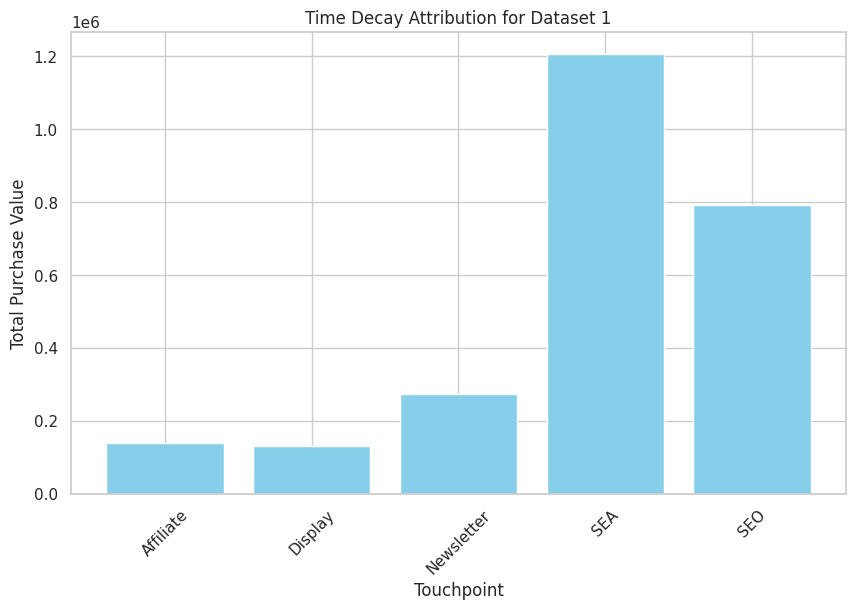

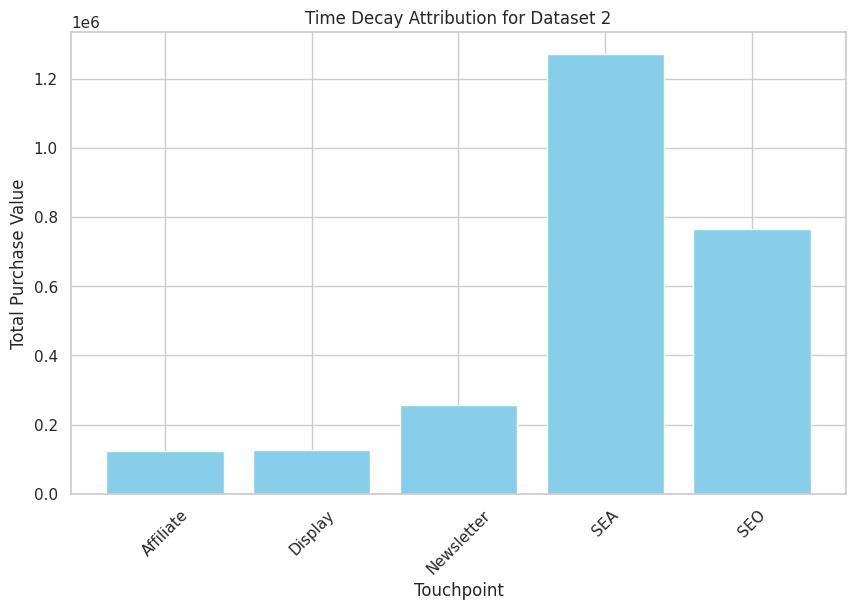

In [121]:
# Visualize the time decay
def plot_time_decay_attribution(data, title):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Touchpoint'], data['Purchase_Value'], color='skyblue')
    plt.xlabel('Touchpoint')
    plt.ylabel('Total Purchase Value')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot for Dataset 1
plot_time_decay_attribution(attribution_df1, 'Time Decay Attribution for Dataset 1')

# Plot for Dataset 2
plot_time_decay_attribution(attribution_df2, 'Time Decay Attribution for Dataset 2')


-------

---------------------------------------------------
---------------------------------------------------


## B. MACHINE LEARNING MODELLING

## 5. Regression MTA

We contineous using the preproccessed dataset from the previous analysis:
 - data1 - customer journey 1
 - data2 - customer journey 2

In [51]:
# Import sklearn for regression analysis
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
# Create  function to split touchpoints into a list

def prepare_data(df):
    # Split touchpoints into a list
    df['Touchpoints_List'] = df['Touchpoints'].apply(lambda x: x.split(' > '))

    # Binarize touchpoints
    mlb = MultiLabelBinarizer()
    touchpoints_encoded = mlb.fit_transform(df['Touchpoints_List'])
    touchpoints_df = pd.DataFrame(touchpoints_encoded, columns=mlb.classes_, index=df.index)

    # Combine with purchase value
    df_prepared = pd.concat([df[['Purchase_Value']], touchpoints_df], axis=1)

    return df_prepared, mlb.classes_

def run_regression(df_prepared):
    X = df_prepared.drop(columns=['Purchase_Value'])
    y = df_prepared['Purchase_Value']

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Coefficients and feature names
    coefficients = model.coef_
    features = X.columns

    # Combine into a DataFrame for better readability
    attribution_df = pd.DataFrame({'Touchpoint': features, 'Coefficient': coefficients})

    return attribution_df

# Prepare data for both datasets
df1_prepared, touchpoints1 = prepare_data(df1)
df2_prepared, touchpoints2 = prepare_data(df2)

# Run regression for both datasets
attribution_df1 = run_regression(df1_prepared)
attribution_df2 = run_regression(df2_prepared)

print("Regression Attribution for Dataset 1:")
print(attribution_df1)

print("\nRegression Attribution for Dataset 2:")
print(attribution_df2)


Regression Attribution for Dataset 1:
   Touchpoint  Coefficient
0   Affiliate     0.674195
1     Display    -1.065662
2  Newsletter    -1.305922
3         SEA    -0.891495
4         SEO     0.318616

Regression Attribution for Dataset 2:
   Touchpoint  Coefficient
0   Affiliate    -1.165447
1     Display     0.487626
2  Newsletter    -0.338628
3         SEA     1.083477
4         SEO    -0.338606


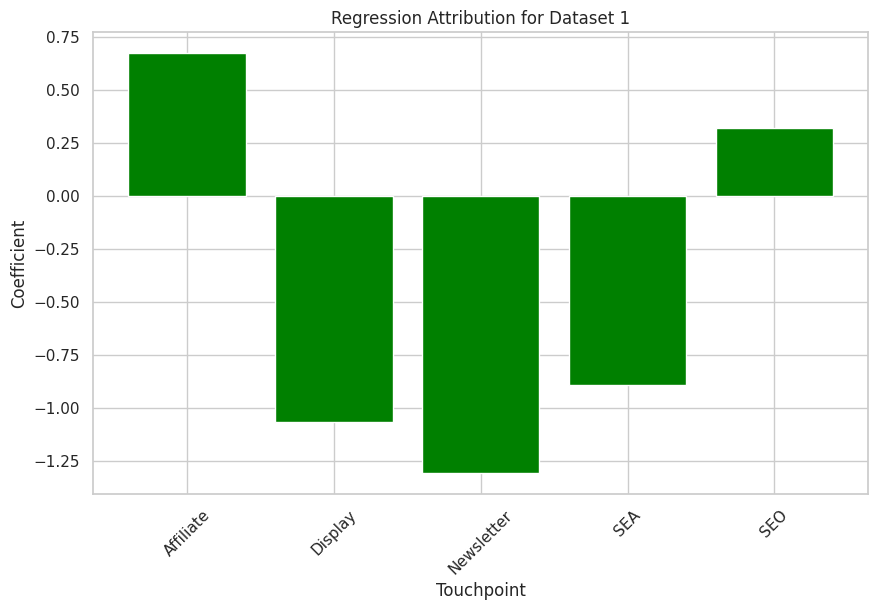

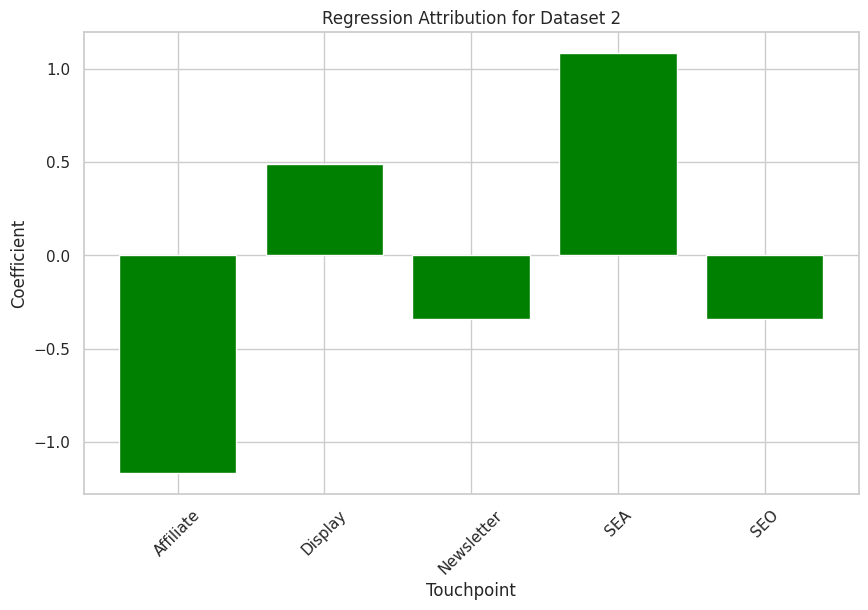

In [53]:
import matplotlib.pyplot as plt

def plot_regression_attribution(data, title):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Touchpoint'], data['Coefficient'], color='green')
    plt.xlabel('Touchpoint')
    plt.ylabel('Coefficient')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot for Dataset 1
plot_regression_attribution(attribution_df1, 'Regression Attribution for Dataset 1')

# Plot for Dataset 2
plot_regression_attribution(attribution_df2, 'Regression Attribution for Dataset 2')



## 6. Shapley Value MTA

In [54]:
pip install shap scikit-learn pandas

In [55]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap


In [56]:
def prepare_data(df):
    # Split touchpoints into a list
    df['Touchpoints_List'] = df['Touchpoints'].apply(lambda x: x.split(' > '))

    # Binarize touchpoints
    mlb = MultiLabelBinarizer()
    touchpoints_encoded = mlb.fit_transform(df['Touchpoints_List'])
    touchpoints_df = pd.DataFrame(touchpoints_encoded, columns=mlb.classes_, index=df.index)

    # Combine with purchase value
    df_prepared = pd.concat([df[['Purchase_Value']], touchpoints_df], axis=1)

    return df_prepared, mlb

def compute_shapley_values(df_prepared, mlb):
    X = df_prepared.drop(columns=['Purchase_Value'])
    y = df_prepared['Purchase_Value']

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Explain the model's predictions using SHAP
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)

    # Average Shapley values over all test instances
    shap_values_df = pd.DataFrame(shap_values.values, columns=X.columns)
    shap_summary = shap_values_df.abs().mean().reset_index()
    shap_summary.columns = ['Touchpoint', 'Mean_Absolute_Shapley_Value']

    return shap_summary

# Prepare data for both datasets
df1_prepared, mlb1 = prepare_data(df1)
df2_prepared, mlb2 = prepare_data(df2)

# Compute Shapley values for both datasets
shapley_df1 = compute_shapley_values(df1_prepared, mlb1)
shapley_df2 = compute_shapley_values(df2_prepared, mlb2)

print("Shapley Value Attribution for Dataset 1:")
print(shapley_df1)

print("\nShapley Value Attribution for Dataset 2:")
print(shapley_df2)

Shapley Value Attribution for Dataset 1:
   Touchpoint  Mean_Absolute_Shapley_Value
0   Affiliate                     0.113175
1     Display                     0.155704
2  Newsletter                     0.330834
3         SEA                     0.377429
4         SEO                     0.158750

Shapley Value Attribution for Dataset 2:
   Touchpoint  Mean_Absolute_Shapley_Value
0   Affiliate                     0.372011
1     Display                     0.151905
2  Newsletter                     0.158342
3         SEA                     0.198063
4         SEO                     0.125469


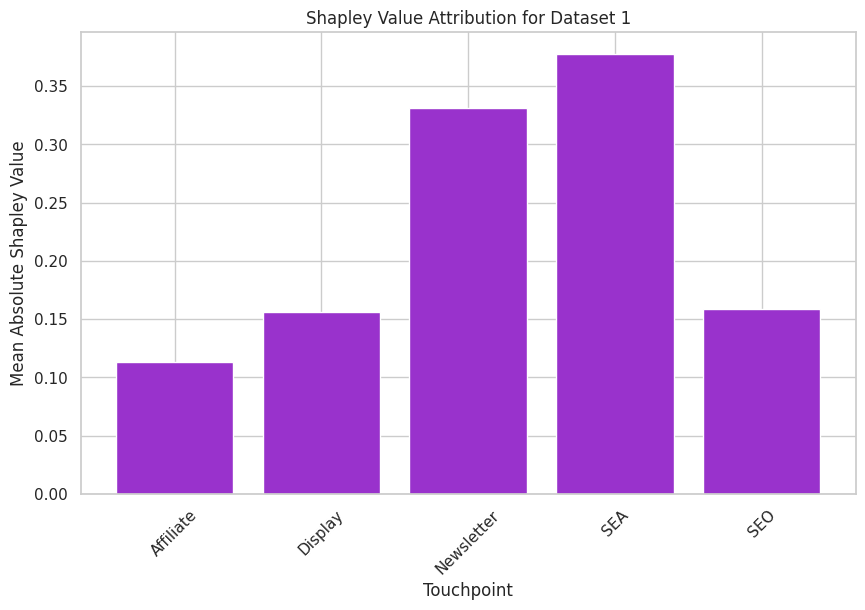

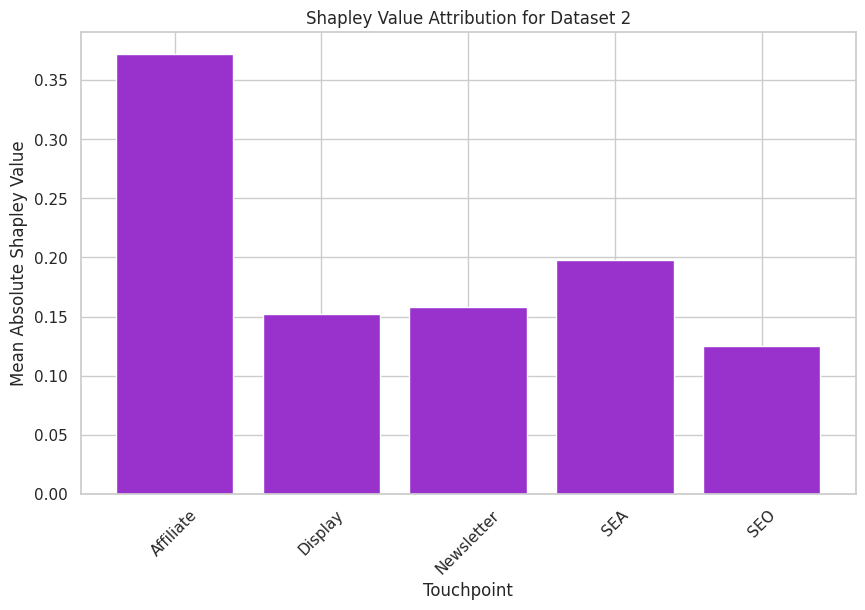

In [57]:
import matplotlib.pyplot as plt

def plot_shapley_values(data, title):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Touchpoint'], data['Mean_Absolute_Shapley_Value'], color='darkorchid')
    plt.xlabel('Touchpoint')
    plt.ylabel('Mean Absolute Shapley Value')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot for Dataset 1
plot_shapley_values(shapley_df1, 'Shapley Value Attribution for Dataset 1')

# Plot for Dataset 2
plot_shapley_values(shapley_df2, 'Shapley Value Attribution for Dataset 2')




##7. Markov Chain MTA



In [58]:
pip install markovify scikit-learn pandas


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18608 sha256=38cb77fb152e652690a6be0958e4aa322f77492878dc1bc588e5704f32937ee6
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


In [59]:
import pandas as pd
from collections import defaultdict
import numpy as np

In [138]:
def prepare_sequences(df):
    df['Touchpoints_List'] = df['Touchpoints'].apply(lambda x: x.split(' > '))
    return df

def build_transition_matrix(sequences):
    transition_counts = defaultdict(lambda: defaultdict(int))
    for sequence in sequences:
        for i in range(len(sequence) - 1):
            current_tp = sequence[i]
            next_tp = sequence[i + 1]
            transition_counts[current_tp][next_tp] += 1
    return transition_counts

def normalize_transition_matrix(transition_counts):
    transition_matrix = {}
    for current_tp, next_tps in transition_counts.items():
        total_transitions = sum(next_tps.values())
        transition_matrix[current_tp] = {next_tp: count / total_transitions for next_tp, count in next_tps.items()}
    return transition_matrix

def calculate_removal_effects(transition_matrix, sequences, touchpoints):
    removal_effects = {tp: 0 for tp in touchpoints}
    for sequence in sequences:
        for tp in touchpoints:
            if tp in sequence:
                modified_sequence = [x for x in sequence if x != tp]
                if modified_sequence:
                    prob_original = calculate_conversion_probability(transition_matrix, sequence)
                    prob_modified = calculate_conversion_probability(transition_matrix, modified_sequence)
                    removal_effects[tp] += prob_original - prob_modified
    return removal_effects

def calculate_conversion_probability(transition_matrix, sequence):
    prob = 1
    for i in range(len(sequence) - 1):
        current_tp = sequence[i]
        next_tp = sequence[i + 1]
        prob *= transition_matrix.get(current_tp, {}).get(next_tp, 0)
    return prob

def calculate_attribution_values(removal_effects, total_value):
    total_effect = sum(removal_effects.values())
    return {tp: (effect / total_effect) * total_value for tp, effect in removal_effects.items()}

# Prepare sequences
df1_sequences = prepare_sequences(df1)['Touchpoints_List']
df2_sequences = prepare_sequences(df2)['Touchpoints_List']

# Build and normalize transition matrices
transition_counts1 = build_transition_matrix(df1_sequences)
transition_counts2 = build_transition_matrix(df2_sequences)
transition_matrix1 = normalize_transition_matrix(transition_counts1)
transition_matrix2 = normalize_transition_matrix(transition_counts2)

# Calculate removal effects
touchpoints1 = set([tp for seq in df1_sequences for tp in seq])
touchpoints2 = set([tp for seq in df2_sequences for tp in seq])
removal_effects1 = calculate_removal_effects(transition_matrix1, df1_sequences, touchpoints1)
removal_effects2 = calculate_removal_effects(transition_matrix2, df2_sequences, touchpoints2)

# Calculate attribution values
total_value1 = df1['Purchase_Value'].sum()
total_value2 = df2['Purchase_Value'].sum()
attribution_values1 = calculate_attribution_values(removal_effects1, total_value1)
attribution_values2 = calculate_attribution_values(removal_effects2, total_value2)

print("Markov Chain Attribution for Dataset 1:")
print(pd.DataFrame(list(attribution_values1.items()), columns=['Touchpoint', 'Attribution_Value']))

print("\nMarkov Chain Attribution for Dataset 2:")
print(pd.DataFrame(list(attribution_values2.items()), columns=['Touchpoint', 'Attribution_Value']))

Markov Chain Attribution for Dataset 1:
   Touchpoint  Attribution_Value
0     Display      238509.541549
1         SEA      938116.562034
2         SEO      702139.839373
3  Newsletter      425677.663646
4   Affiliate      243510.789537

Markov Chain Attribution for Dataset 2:
   Touchpoint  Attribution_Value
0     Display       1.390685e+05
1         SEA       1.180354e+06
2         SEO       8.120736e+05
3  Newsletter       2.761014e+05
4   Affiliate       1.357780e+05


<ipython-input-140-b2ea9222dca4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attribution_Value', y='Touchpoint', data=df, palette='viridis')


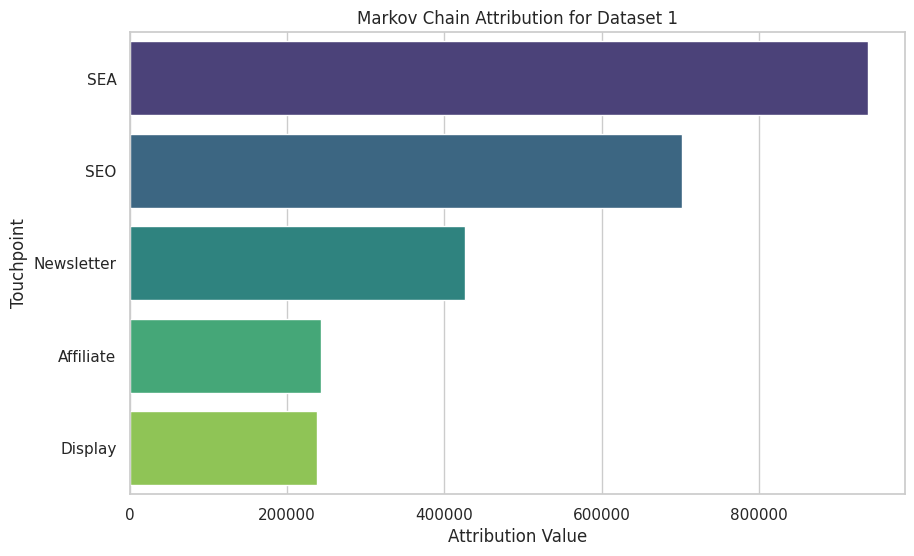

<ipython-input-140-b2ea9222dca4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attribution_Value', y='Touchpoint', data=df, palette='viridis')


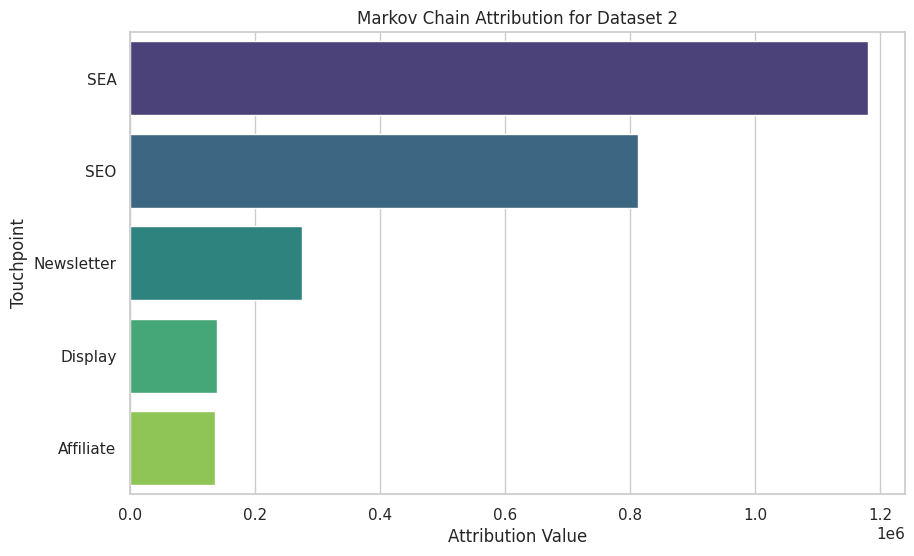

In [140]:
# Function to plot the Markov Chain attribution results
def plot_attribution(attribution_values, title):
    # Convert the attribution values to a DataFrame
    df = pd.DataFrame(list(attribution_values.items()), columns=['Touchpoint', 'Attribution_Value'])

    # Sort the DataFrame by Attribution_Value in descending order
    df = df.sort_values(by='Attribution_Value', ascending=False)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Attribution_Value', y='Touchpoint', data=df, palette='viridis')

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Attribution Value')
    plt.ylabel('Touchpoint')

    # Show the plot
    plt.show()

# Example usage with the calculated attribution values
plot_attribution(attribution_values1, "Markov Chain Attribution for Dataset 1")
plot_attribution(attribution_values2, "Markov Chain Attribution for Dataset 2")
